In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import pandas as pd
import datetime

from pathlib import Path
from scipy import integrate
from run_analysis import postprocess, preprocess

sns.set_theme(style='darkgrid')

In [2]:
eraDf = pd.read_csv(os.path.join('Analysis', 'eraDf.csv'))
remsDf = pd.read_csv(os.path.join('Analysis', 'remsDf.csv'))
outDf = pd.read_csv(os.path.join('Analysis', 'outDf.csv'))

remsDf.timemet = remsDf.timemet.apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
eraDf.timemet = eraDf.timemet.apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
outDf.time = outDf.time.apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

In [14]:
print(outDf.time.min())
print(outDf.time.max())

era_only = False
time_lim = [datetime.datetime.strptime("2015-04-20 01:00:00", '%Y-%m-%d %H:%M:%S'), 
            datetime.datetime.strptime("2015-04-20 06:00:00", '%Y-%m-%d %H:%M:%S')]
# time_lim = [datetime.datetime.strptime("2015-04-02 23:00:00", '%Y-%m-%d %H:%M:%S'), 
#             datetime.datetime.strptime("2015-04-03 02:00:00", '%Y-%m-%d %H:%M:%S')]
#time_lim = None

2015-04-01 00:00:00
2015-04-30 23:00:00


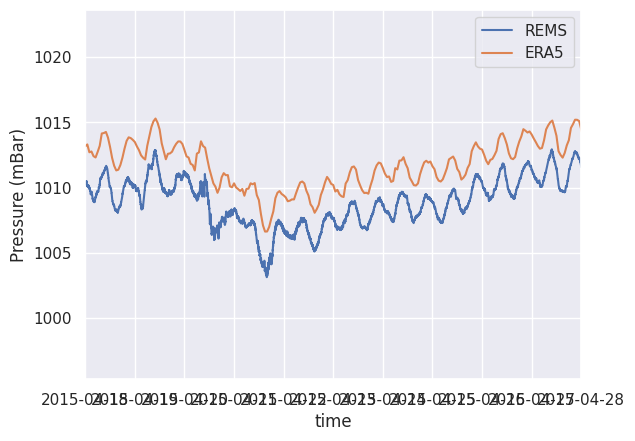

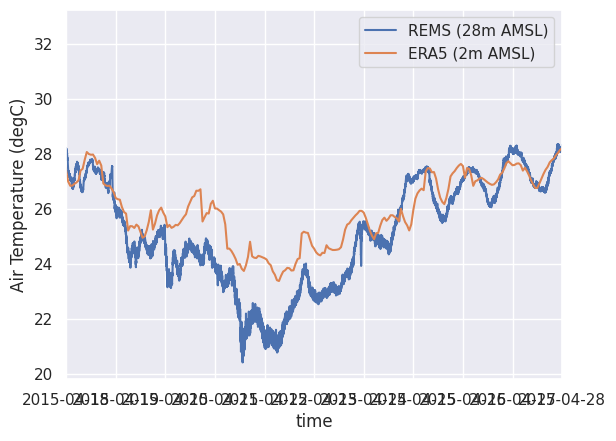

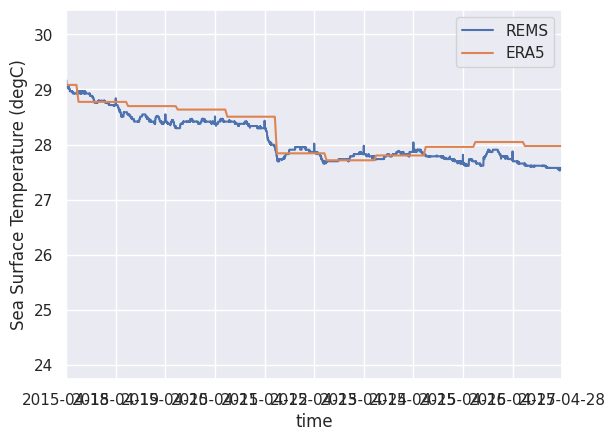

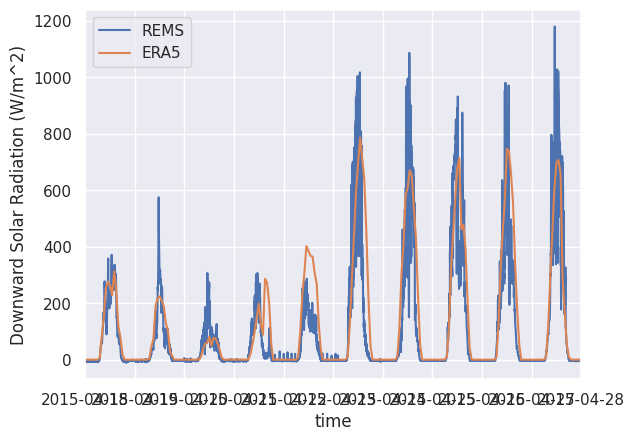

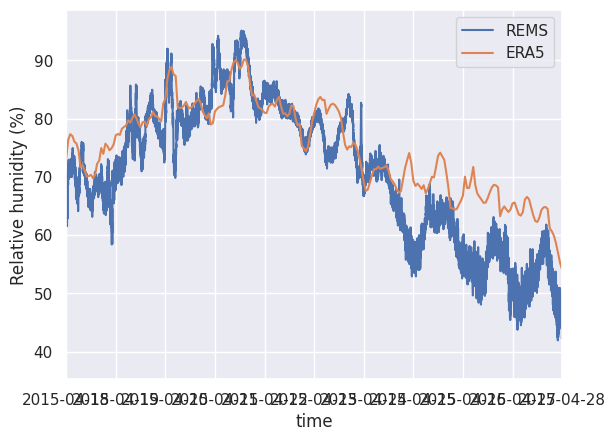

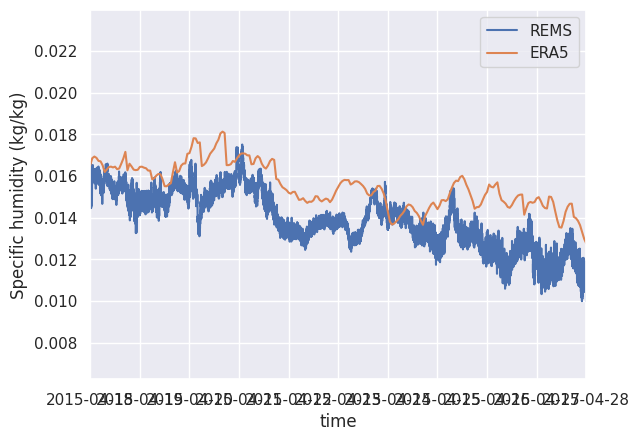

In [9]:
preprocess(eraDf, remsDf, writeDir=None, era_only=era_only, save_plots=False, time_lim=time_lim);

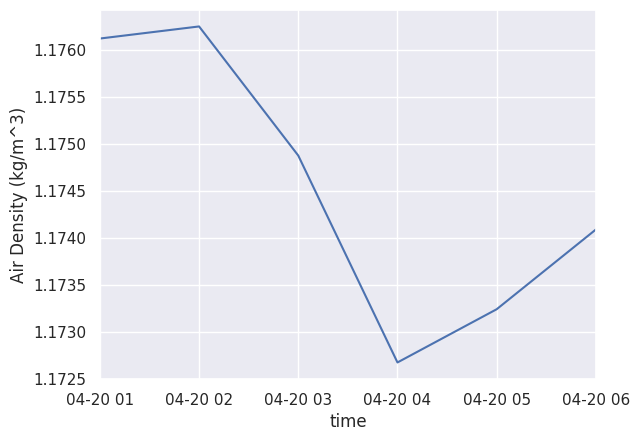

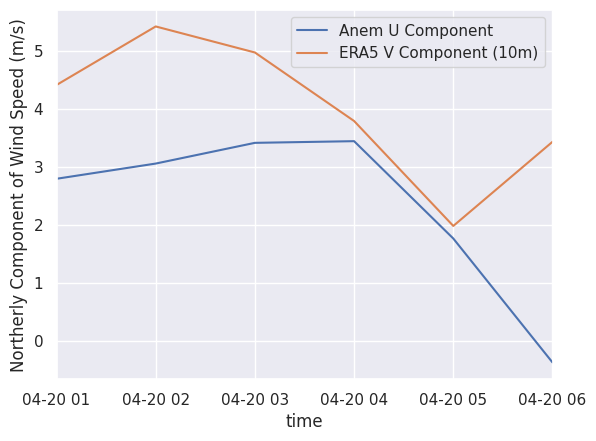

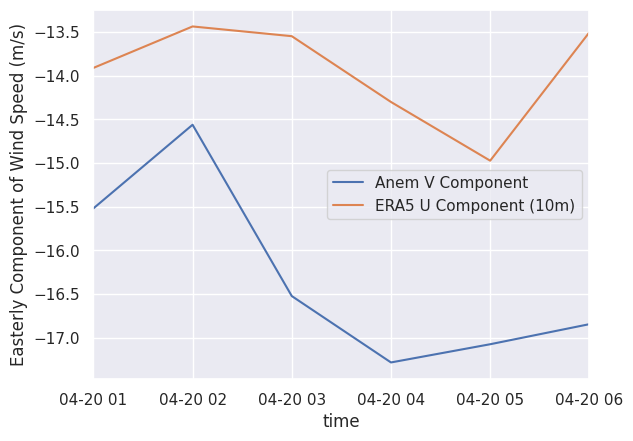

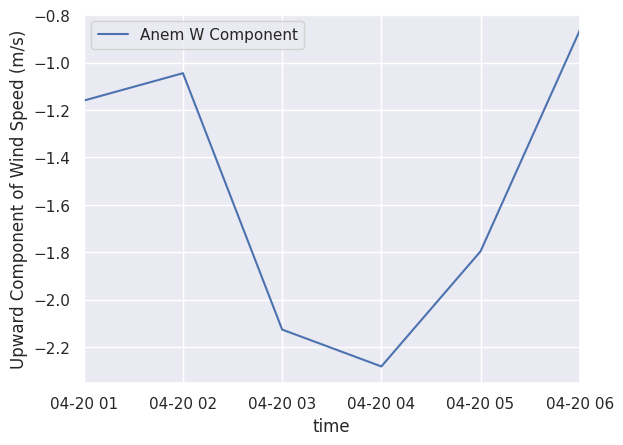

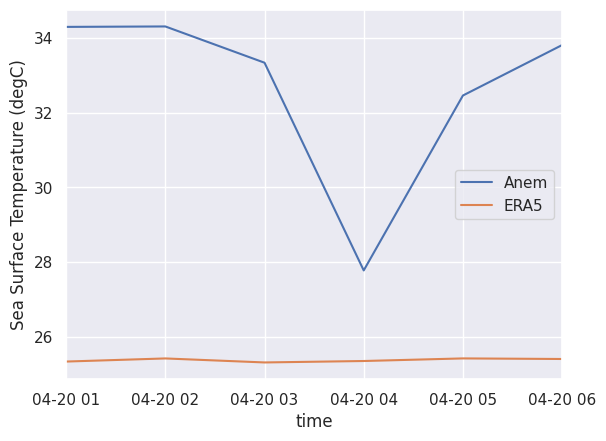

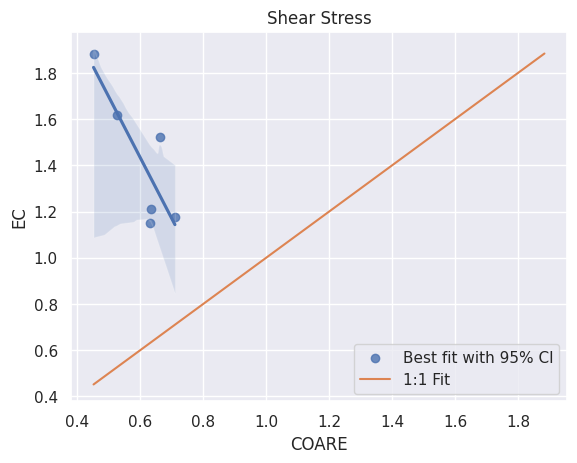

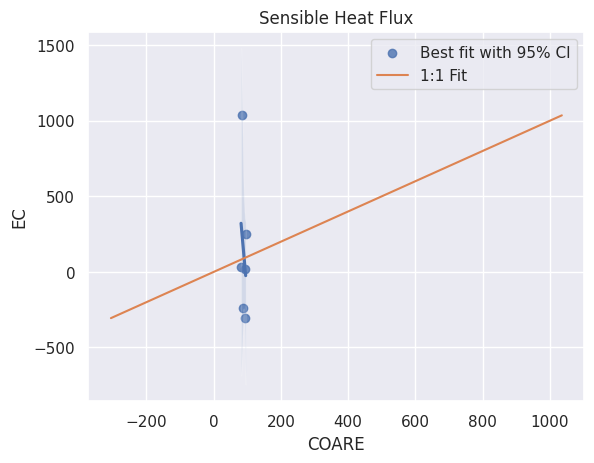

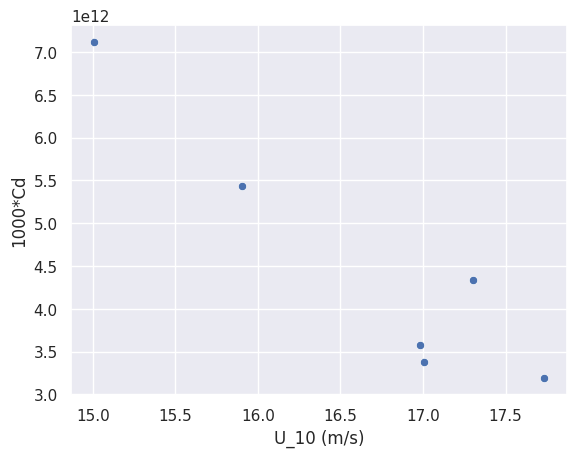

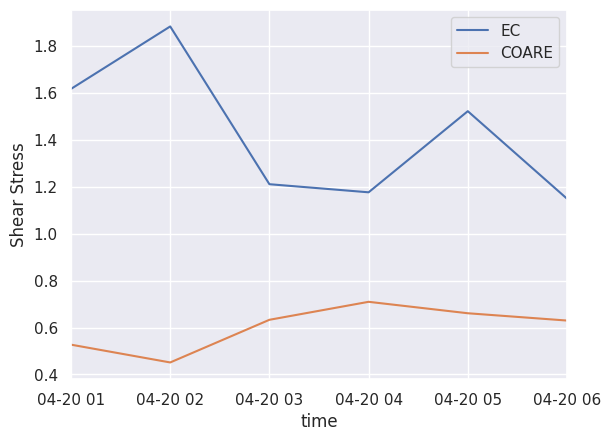

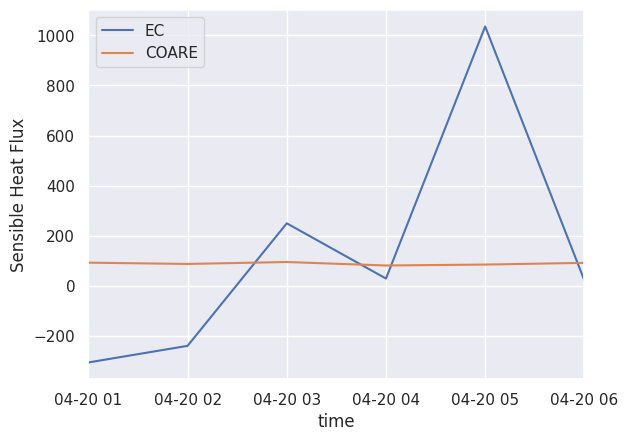

In [15]:
postprocess(outDf, eraDf, remsDf, writeDir=None, era_only=era_only, save_plots=False, time_lim=time_lim);

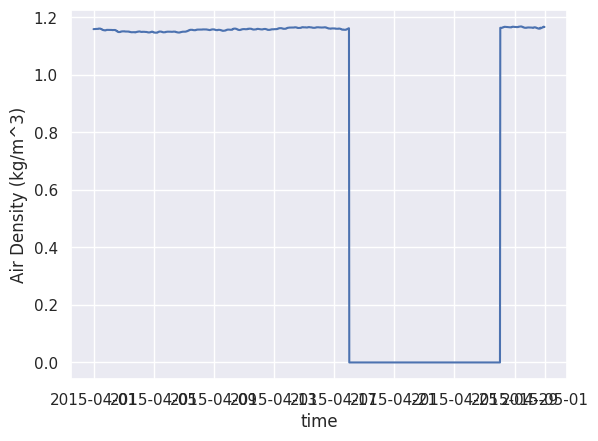

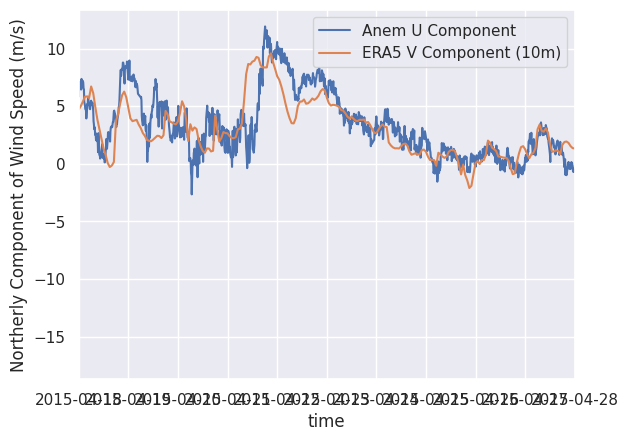

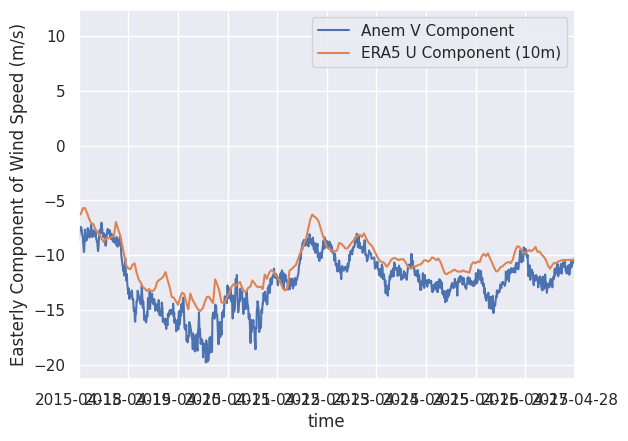

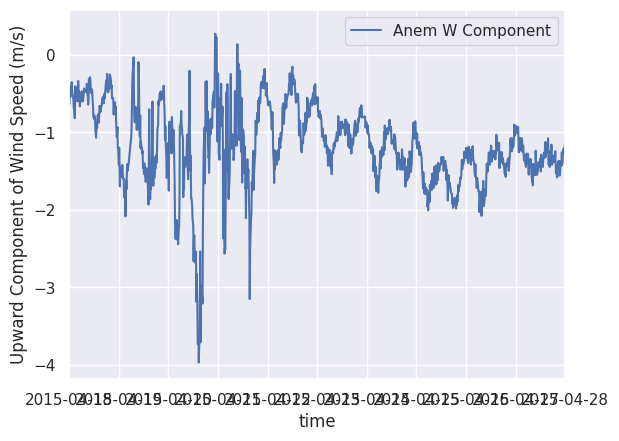

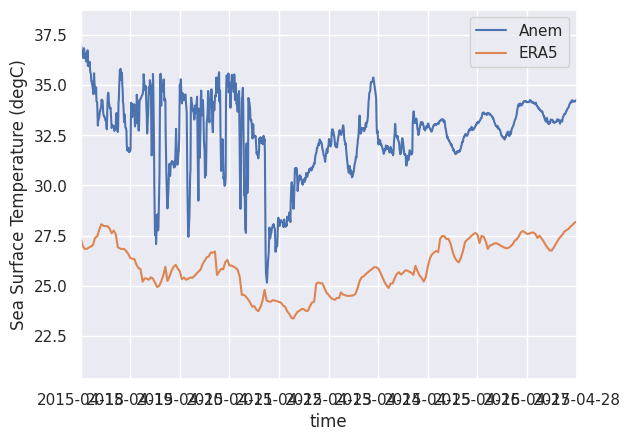

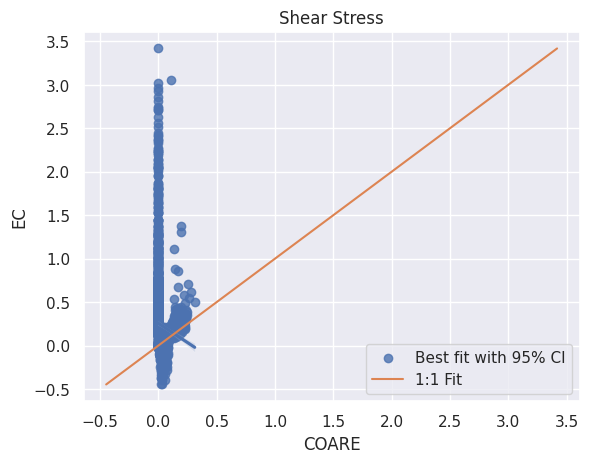

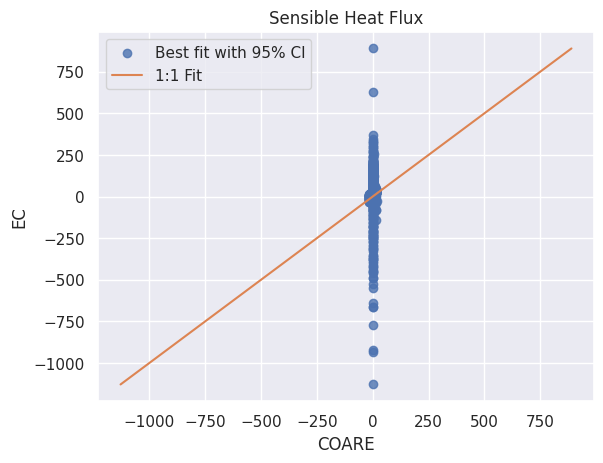

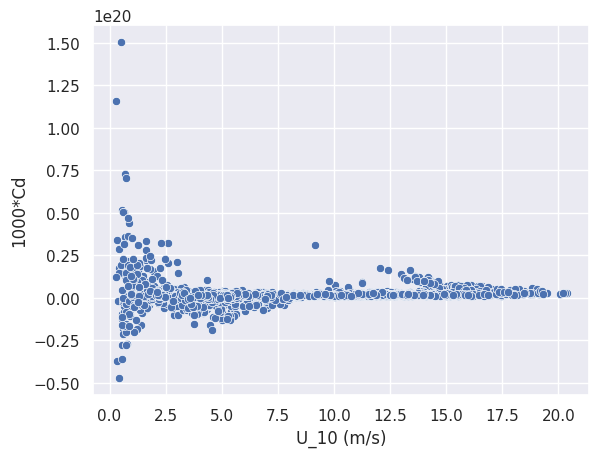

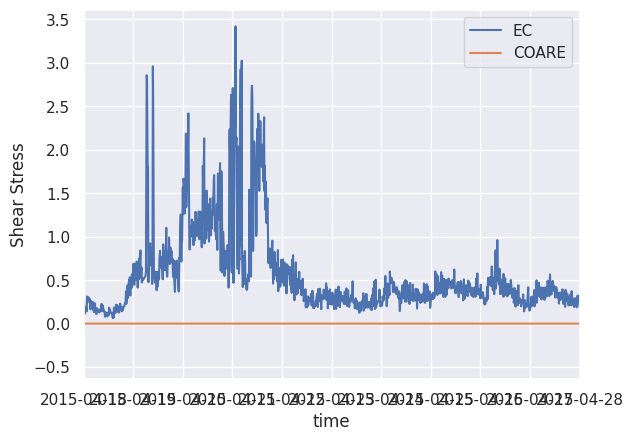

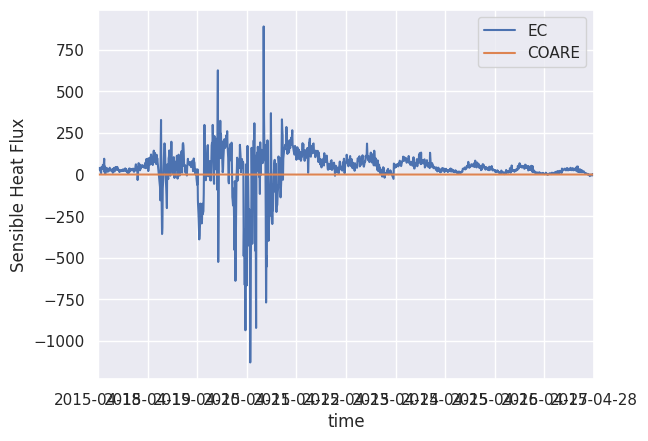

In [70]:
sns.lineplot(data=outDf, x='time', y='rho', markers=True)
plt.xlabel('time')
plt.ylabel('Air Density (kg/m^3)')
#if not era_only: plt.xlim([remsDf.timemet[0], remsDf.timemet[len(remsDf) - 1]])
plt.show()

sns.lineplot(data=outDf, x='time', y='u', label="Anem U Component")
sns.lineplot(data=eraDf, x='timemet', y='v_10', label="ERA5 V Component (10m)")
plt.xlabel('time')
plt.ylabel('Northerly Component of Wind Speed (m/s)')
if not era_only: plt.xlim([remsDf.timemet[0], remsDf.timemet[len(remsDf) - 1]])
plt.show()

sns.lineplot(data=outDf, x='time', y='v', label="Anem V Component")
sns.lineplot(data=eraDf, x='timemet', y='u_10', label="ERA5 U Component (10m)")
plt.xlabel('time')
plt.ylabel('Easterly Component of Wind Speed (m/s)')
if not era_only: plt.xlim([remsDf.timemet[0], remsDf.timemet[len(remsDf) - 1]])
plt.show()

sns.lineplot(data=outDf, x='time', y='w', label="Anem W Component")
plt.xlabel('time')
plt.ylabel('Upward Component of Wind Speed (m/s)')
if not era_only: plt.xlim([remsDf.timemet[0], remsDf.timemet[len(remsDf) - 1]])
plt.show()

sns.lineplot(data=outDf, x='time', y='ta', label="Anem")
sns.lineplot(data=eraDf, x='timemet', y='ta', label="ERA5")
plt.xlabel('time')
plt.ylabel('Sea Surface Temperature (degC)')
if not era_only: plt.xlim([remsDf.timemet[0], remsDf.timemet[len(remsDf) - 1]])
plt.show()

lin_lims = [min([min(outDf.tauCoare), min(outDf.tauApprox)]), max([max(outDf.tauCoare), max(outDf.tauApprox)])]
sns.regplot(data=outDf, x='tauCoare', y='tauApprox', label='Best fit with 95% CI')
sns.lineplot(x=lin_lims, y=lin_lims, label='1:1 Fit')
plt.xlabel('COARE')
plt.ylabel('EC')
plt.title('Shear Stress')
plt.show()

lin_lims = [min([min(outDf.HCoare), min(outDf.HApprox)]), max([max(outDf.HCoare), max(outDf.HApprox)])]
sns.regplot(data=outDf, x='HCoare', y='HApprox', label='Best fit with 95% CI')
sns.lineplot(x=lin_lims, y=lin_lims, label='1:1 Fit')
plt.xlabel('COARE')
plt.ylabel('EC')
plt.title('Sensible Heat Flux')
plt.show()

outDf.Cd = 1000*outDf.Cd

sns.scatterplot(data=outDf, x='U10', y='Cd')
# plt.xlim([0, 25])
# plt.ylim([-2,5])
plt.xlabel('U_10 (m/s)')
plt.ylabel('1000*Cd')
plt.show()

sns.lineplot(data=outDf, x='time', y='tauApprox', label="EC", markers=True)
sns.lineplot(data=outDf, x='time', y='tauCoare', label="COARE", markers=True)
plt.xlabel('time')
plt.ylabel('Shear Stress')
if not era_only: plt.xlim([remsDf.timemet[0], remsDf.timemet[len(remsDf) - 1]])
plt.show()

sns.lineplot(data=outDf, x='time', y='HApprox', label="EC", markers=True)
sns.lineplot(data=outDf, x='time', y='HCoare', label="COARE", markers=True)
plt.xlabel('time')
plt.ylabel('Sensible Heat Flux')
if not era_only: plt.xlim([remsDf.timemet[0], remsDf.timemet[len(remsDf) - 1]])